In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Data-Collisions.csv")

C:\Users\RonaldDIPAOLA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Show how many rows and columns
df.shape

(194673, 38)

In [4]:
# Show the data types of the columns
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [6]:
# build dataframe

df_new = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','PEDCOUNT','PEDCYLCOUNT','JUNCTIONTYPE','ADDRTYPE']]
df_new.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,JUNCTIONTYPE,ADDRTYPE
0,2,Overcast,Wet,Daylight,Angles,0,0,At Intersection (intersection related),Intersection
1,1,Raining,Wet,Dark - Street Lights On,Sideswipe,0,0,Mid-Block (not related to intersection),Block
2,1,Overcast,Dry,Daylight,Parked Car,0,0,Mid-Block (not related to intersection),Block
3,1,Clear,Dry,Daylight,Other,0,0,Mid-Block (not related to intersection),Block
4,2,Raining,Wet,Daylight,Angles,0,0,At Intersection (intersection related),Intersection


In [7]:
# drop NaN values
df_new[df_new.isnull().any(axis=1)]

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,JUNCTIONTYPE,ADDRTYPE
15,1,NaN,NaN,NaN,NaN,0,0,Driveway Junction,Block
36,1,NaN,NaN,NaN,NaN,0,0,Driveway Junction,Block
53,2,NaN,NaN,NaN,NaN,0,0,At Intersection (intersection related),Intersection
60,1,NaN,NaN,NaN,NaN,0,0,Mid-Block (not related to intersection),Block
74,1,Clear,Dry,Daylight,Parked Car,0,0,Mid-Block (not related to intersection),NaN
...,...,...,...,...,...,...,...,...,...
194625,1,NaN,NaN,NaN,NaN,0,0,Mid-Block (not related to intersection),Block
194646,1,NaN,NaN,NaN,NaN,0,0,Mid-Block (not related to intersection),Block
194654,1,NaN,NaN,NaN,NaN,0,0,At Intersection (intersection related),Intersection
194655,2,NaN,NaN,NaN,NaN,0,0,At Intersection (intersection related),Intersection


In [8]:
df_new = df_new.dropna()
df_new.shape

(182895, 9)

In [9]:
df_new["WEATHER"].value_counts()

Clear                       109059
Raining                      32642
Overcast                     27183
Unknown                      11637
Snowing                        881
Other                          746
Fog/Smog/Smoke                 556
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [10]:
df_new.drop(df_new[(df_new.WEATHER =='Unknown')|(df_new.WEATHER =='Other')].index, inplace=True)

In [11]:
df_new["WEATHER"].value_counts()

Clear                       109059
Raining                      32642
Overcast                     27183
Snowing                        881
Fog/Smog/Smoke                 556
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [12]:
df_new["WEATHER"] = df_new["WEATHER"].astype('category')
df_new["WEATHER_CATEGORY"] = df_new["WEATHER"].cat.codes

In [13]:
df_new.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,JUNCTIONTYPE,ADDRTYPE,WEATHER_CATEGORY
0,2,Overcast,Wet,Daylight,Angles,0,0,At Intersection (intersection related),Intersection,3
1,1,Raining,Wet,Dark - Street Lights On,Sideswipe,0,0,Mid-Block (not related to intersection),Block,5
2,1,Overcast,Dry,Daylight,Parked Car,0,0,Mid-Block (not related to intersection),Block,3
3,1,Clear,Dry,Daylight,Other,0,0,Mid-Block (not related to intersection),Block,1
4,2,Raining,Wet,Daylight,Angles,0,0,At Intersection (intersection related),Intersection,5


In [14]:
df_new["ROADCOND"].value_counts()

Dry               121201
Wet                46237
Ice                 1094
Snow/Slush           884
Unknown              771
Other                104
Standing Water       104
Sand/Mud/Dirt         60
Oil                   57
Name: ROADCOND, dtype: int64

In [15]:
df_new.drop(df_new[(df_new.ROADCOND =='Unknown')|(df_new.ROADCOND =='Other')].index, inplace=True)

In [16]:
df_new["ROADCOND"].value_counts()

Dry               121201
Wet                46237
Ice                 1094
Snow/Slush           884
Standing Water       104
Sand/Mud/Dirt         60
Oil                   57
Name: ROADCOND, dtype: int64

In [17]:
df_new["ROADCOND"] = df_new["ROADCOND"].astype('category')
df_new["ROADCOND_CATEGORY"] = df_new["ROADCOND"].cat.codes

In [18]:
df_new["LIGHTCOND"].value_counts()

Daylight                    110934
Dark - Street Lights On      46018
Dusk                          5555
Dawn                          2372
Unknown                       2142
Dark - No Street Lights       1351
Dark - Street Lights Off      1085
Other                          172
Dark - Unknown Lighting          8
Name: LIGHTCOND, dtype: int64

In [19]:
df_new.drop(df_new[(df_new.LIGHTCOND =='Unknown')|(df_new.LIGHTCOND =='Other')].index, inplace=True)

In [20]:
df_new["LIGHTCOND"].value_counts()

Daylight                    110934
Dark - Street Lights On      46018
Dusk                          5555
Dawn                          2372
Dark - No Street Lights       1351
Dark - Street Lights Off      1085
Dark - Unknown Lighting          8
Name: LIGHTCOND, dtype: int64

In [21]:
df_new["LIGHTCOND"] = df_new["LIGHTCOND"].astype('category')
df_new["LIGHTCOND_CATEGORY"] = df_new["LIGHTCOND"].cat.codes

In [22]:
df_new["COLLISIONTYPE"].value_counts()

Angles        33668
Parked Car    32427
Rear Ended    32348
Other         21951
Sideswipe     17422
Left Turn     13320
Pedestrian     6257
Cycles         5191
Right Turn     2801
Head On        1938
Name: COLLISIONTYPE, dtype: int64

In [23]:
df_new.drop(df_new[(df_new.COLLISIONTYPE =='Unknown')|(df_new.COLLISIONTYPE =='Other')].index, inplace=True)

In [24]:
df_new["COLLISIONTYPE"] = df_new["COLLISIONTYPE"].astype('category')
df_new["COLLISIONTYPE_CATEGORY"] = df_new["COLLISIONTYPE"].cat.codes

In [25]:
df_new["COLLISIONTYPE"].value_counts()

Angles        33668
Parked Car    32427
Rear Ended    32348
Sideswipe     17422
Left Turn     13320
Pedestrian     6257
Cycles         5191
Right Turn     2801
Head On        1938
Name: COLLISIONTYPE, dtype: int64

In [26]:
df_new["PEDCOUNT"].value_counts()

0    138849
1      6284
2       216
3        20
4         2
6         1
Name: PEDCOUNT, dtype: int64

In [27]:
df_new["PEDCYLCOUNT"].value_counts()

0    140136
1      5195
2        41
Name: PEDCYLCOUNT, dtype: int64

In [28]:
df_new["JUNCTIONTYPE"].value_counts()

Mid-Block (not related to intersection)              63102
At Intersection (intersection related)               56031
Mid-Block (but intersection related)                 18194
Driveway Junction                                     6362
At Intersection (but not related to intersection)     1556
Ramp Junction                                          124
Unknown                                                  3
Name: JUNCTIONTYPE, dtype: int64

In [29]:
df_new.drop(df_new[(df_new.JUNCTIONTYPE =='Unknown')|(df_new.JUNCTIONTYPE =='Other')].index, inplace=True)

In [30]:
df_new["JUNCTIONTYPE"] = df_new["JUNCTIONTYPE"].astype('category')
df_new["JUNCTIONTYPE_CATEGORY"] = df_new["JUNCTIONTYPE"].cat.codes

In [31]:
df_new["JUNCTIONTYPE_CATEGORY"].value_counts()

4    63102
1    56031
3    18194
2     6362
0     1556
5      124
Name: JUNCTIONTYPE_CATEGORY, dtype: int64

In [32]:
df_new["ADDRTYPE"].value_counts()

Block           87661
Intersection    57611
Alley              97
Name: ADDRTYPE, dtype: int64

In [33]:
df_new["ADDRTYPE"] = df_new["ADDRTYPE"].astype('category')
df_new["ADDRTYPE_CATEGORY"] = df_new["ADDRTYPE"].cat.codes

In [34]:
df_new["ADDRTYPE_CATEGORY"].value_counts()

1    87661
2    57611
0       97
Name: ADDRTYPE_CATEGORY, dtype: int64

In [35]:
# rebalancing data, see counts of target variables
df_new['SEVERITYCODE'].value_counts()

1    95921
2    49448
Name: SEVERITYCODE, dtype: int64

In [36]:
# resample the dataframe to be balanced
from sklearn.utils import resample

In [37]:
sev_one_df = df_new[df_new.SEVERITYCODE==1]
sev_two_df = df_new[df_new.SEVERITYCODE==2]

balanced_df_sev_one = resample(sev_one_df,replace=False,n_samples=49448,random_state=20)

balanced_df = pd.concat([balanced_df_sev_one,sev_two_df])

In [38]:
balanced_df.SEVERITYCODE.value_counts()

2    49448
1    49448
Name: SEVERITYCODE, dtype: int64

In [39]:
balanced_df.drop(columns=['COLLISIONTYPE','WEATHER', 'ROADCOND','LIGHTCOND','JUNCTIONTYPE','ADDRTYPE'], inplace = True)

In [40]:
balanced_df.head()

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,WEATHER_CATEGORY,ROADCOND_CATEGORY,LIGHTCOND_CATEGORY,COLLISIONTYPE_CATEGORY,JUNCTIONTYPE_CATEGORY,ADDRTYPE_CATEGORY
151817,1,0,0,5,6,2,6,3,1
140399,1,0,0,1,0,5,0,1,2
113816,1,0,1,5,6,2,6,3,1
113143,1,0,0,5,6,2,4,4,1
91720,1,0,0,5,6,5,4,4,1


In [41]:
balanced_df.dtypes

SEVERITYCODE              int64
PEDCOUNT                  int64
PEDCYLCOUNT               int64
WEATHER_CATEGORY           int8
ROADCOND_CATEGORY          int8
LIGHTCOND_CATEGORY         int8
COLLISIONTYPE_CATEGORY     int8
JUNCTIONTYPE_CATEGORY      int8
ADDRTYPE_CATEGORY          int8
dtype: object

In [42]:
balanced_df.SEVERITYCODE.value_counts()

2    49448
1    49448
Name: SEVERITYCODE, dtype: int64

In [43]:
#Y = balanced_df['SEVERITYCODE'].values
Y = np.asarray(balanced_df['SEVERITYCODE'])
Y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [44]:
#X= preprocessing.StandardScaler().fit(balanced_df).transform(balanced_df)
X = np.asarray(balanced_df[['WEATHER_CATEGORY','ROADCOND_CATEGORY','LIGHTCOND_CATEGORY','COLLISIONTYPE_CATEGORY','PEDCOUNT','PEDCYLCOUNT','JUNCTIONTYPE_CATEGORY','ADDRTYPE_CATEGORY']])
X[0:5]

array([[5, 6, 2, 6, 0, 0, 3, 1],
       [1, 0, 5, 0, 0, 0, 1, 2],
       [5, 6, 2, 6, 0, 1, 3, 1],
       [5, 6, 2, 4, 0, 0, 4, 1],
       [5, 6, 5, 4, 0, 0, 4, 1]], dtype=int64)

In [45]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (69227, 8) (69227,)
Test set: (29669, 8) (29669,)


In [47]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy")#, max_depth = 8)
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
DT_yhat = DT_model.predict(X_test)

In [49]:
#Model evaluation
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy of Decision Tree model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, DT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, DT_yhat))
print("Jaccard index: %.3f" % jaccard_score(Y_test, DT_yhat))
print("F1-score: %.3f" % f1_score(Y_test, DT_yhat, average='weighted') )
print("R2-score: %.3f" % r2_score(DT_yhat , Y_test) )
print(classification_report(Y_test, DT_yhat))

Accuracy of Decision Tree model:
Train set Accuracy:  0.7004348014503012
Test set Accuracy:  0.6894064511779973
Jaccard index: 0.461
F1-score: 0.682
R2-score: -0.376
              precision    recall  f1-score   support

           1       0.77      0.53      0.63     14766
           2       0.65      0.84      0.73     14903

    accuracy                           0.69     29669
   macro avg       0.71      0.69      0.68     29669
weighted avg       0.71      0.69      0.68     29669



In [50]:
# Support Vector Machine
from sklearn import svm
SVM_model = svm.SVC(kernel='linear')
SVM_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [51]:
SVM_yhat = SVM_model.predict(X_test)

In [52]:
#Model evaluation
print("Accuracy of SVM model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, SVM_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, SVM_yhat))
print("Jaccard index: %.3f" % jaccard_score(Y_test, SVM_yhat))
print("F1-score: %.3f" % f1_score(Y_test, SVM_yhat, average='weighted') )
print("R2-score: %.3f" % r2_score(SVM_yhat , Y_test) )
print(classification_report(Y_test, SVM_yhat))

Accuracy of SVM model:
Train set Accuracy:  0.6310688026348101
Test set Accuracy:  0.6282988978394958
Jaccard index: 0.470
F1-score: 0.628
R2-score: -0.494
              precision    recall  f1-score   support

           1       0.62      0.66      0.64     14766
           2       0.64      0.59      0.62     14903

    accuracy                           0.63     29669
   macro avg       0.63      0.63      0.63     29669
weighted avg       0.63      0.63      0.63     29669



In [53]:
#K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

In [54]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62068152, 0.60588493, 0.66409384, 0.65630793, 0.66743065,
       0.64673565, 0.65897064, 0.65492602, 0.6606559 , 0.65438673,
       0.6638579 , 0.64451111, 0.6644983 , 0.65492602, 0.65772355,
       0.64430887, 0.68010381, 0.64542115, 0.67862078, 0.64538744,
       0.64926354, 0.64761199, 0.67346388, 0.67046412, 0.67043042,
       0.65064545, 0.66668914, 0.66571169, 0.6696889 , 0.6677677 ,
       0.67049783, 0.67002595, 0.66992484, 0.65445414, 0.65512825,
       0.65148809, 0.65529677, 0.65576865, 0.65570124, 0.65651016,
       0.65843136, 0.6561057 , 0.65988068, 0.65826283, 0.65961104,
       0.65816172, 0.65849877, 0.65785837, 0.65873471])

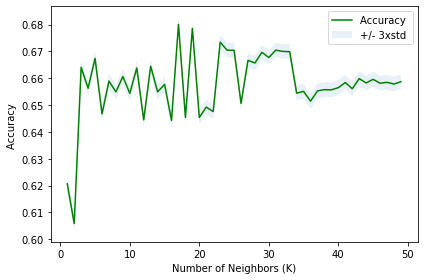

In [55]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [56]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6801038120597256 with k= 17


In [57]:
#Re-run the model with the best K  
print("Fitting with k="+str(mean_acc.argmax()+1))
kNN_model = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train,Y_train)
kNN_yhat = kNN_model.predict(X_test)  
kNN_model

Fitting with k=17


KNeighborsClassifier(n_neighbors=17)

In [58]:
#Knn Model evaluation
print("Accuracy of kNN model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, kNN_yhat))
print("Jaccard index: %.3f" % jaccard_score(Y_test, kNN_yhat))
print("F1-score: %.3f" % f1_score(Y_test, kNN_yhat, average='weighted') )
print("R2-score: %.3f" % r2_score(kNN_yhat , Y_test) )
print(classification_report(Y_test, kNN_yhat))

Accuracy of kNN model:
Train set Accuracy:  0.6871162985540323
Test set Accuracy:  0.6801038120597256
Jaccard index: 0.472
F1-score: 0.677
R2-score: -0.339
              precision    recall  f1-score   support

           1       0.73      0.58      0.64     14766
           2       0.65      0.78      0.71     14903

    accuracy                           0.68     29669
   macro avg       0.69      0.68      0.68     29669
weighted avg       0.69      0.68      0.68     29669



In [59]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,Y_train)

In [60]:
LR_yhat = LR_model.predict(X_test)

In [61]:
#Model evaluation
print("Accuracy of Logistic Regression model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, LR_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, LR_yhat))
print("Jaccard index: %.3f" % jaccard_score(Y_test, LR_yhat))
print("F1-score: %.3f" % f1_score(Y_test, LR_yhat, average='weighted') )
print("R2-score: %.3f" % r2_score(LR_yhat , Y_test) )
print(classification_report(Y_test, LR_yhat))

Accuracy of Logistic Regression model:
Train set Accuracy:  0.632701113727303
Test set Accuracy:  0.6277933196265463
Jaccard index: 0.470
F1-score: 0.627
R2-score: -0.496
              precision    recall  f1-score   support

           1       0.62      0.66      0.64     14766
           2       0.64      0.59      0.62     14903

    accuracy                           0.63     29669
   macro avg       0.63      0.63      0.63     29669
weighted avg       0.63      0.63      0.63     29669

